# Imports

In [6]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
import pickle

# Configs

In [7]:
train_data_root = 'C:\\Users\\MLR\\data'
test_data_root = 'C:\\Users\\MLR\\data'
#train_data_root = '/mnt/data/mlr_ahj_datasets/mnist/packed/train'
#test_data_root = '/mnt/data/mlr_ahj_datasets/mnist/packed/test'

# Utility

In [8]:
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data
    
def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names

cifar_10_dir = '/mnt/data/mlr_ahj_datasets/cifar10/cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
    load_cifar_10_data(cifar_10_dir)

# Analysis

## General

In [11]:
df_train = pd.DataFrame(train_labels)
df_test = pd.DataFrame(test_labels)

## Visualization

### Label distribution

In [13]:
labels = range(0, 10)
 
a_heights, _ = np.histogram(df_train[0], bins=10, )
b_heights, _ = np.histogram(df_test[0], bins=10)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, a_heights, width, label='Train/Validation')
rects2 = ax.bar(x + width/2, b_heights, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. samples')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
plt.tight_layout()
plt.show()

## Train/validation - Test proportions

Text(20.847222222222214, 0.5, 'No. samples')

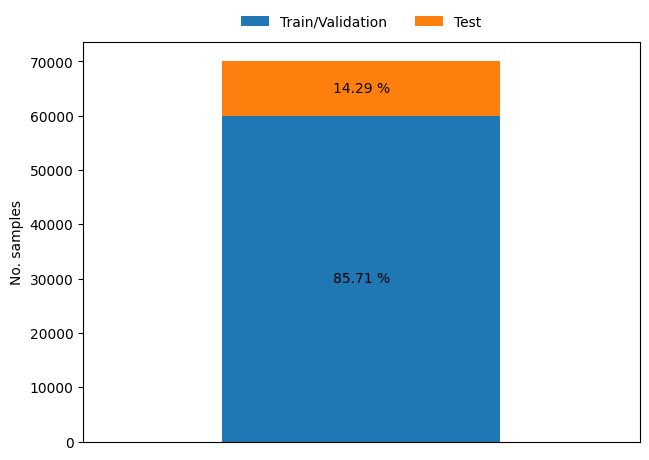

In [ ]:
df = pd.DataFrame({'Train/Validation' : [len(train_data)] ,
                   'Test' : [len(test_data)]})
df.plot.bar(stacked=True)



for ix, row in df.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{round(element/70000 * 100, 2)} %",
                    va="center",
                    ha="center",
                )
                cumulative += element
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )

plt.tight_layout()
plt.xticks([])
plt.ylabel("No. samples")

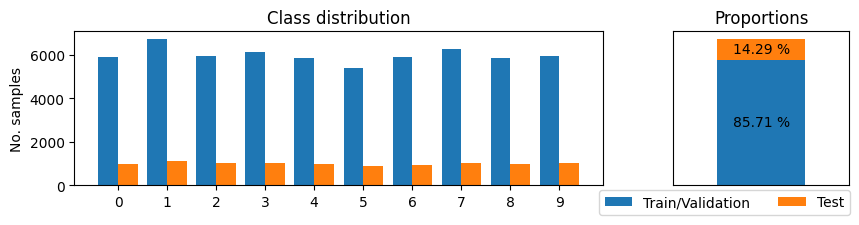

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(10,2))
df = pd.DataFrame({'Train/Validation' : [len(train_data)] ,
                   'Test' : [len(test_data)]})
df.plot.bar(stacked=True, ax=ax2, legend=None)

for ix, row in df.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{round(element/70000 * 100, 2)} %",
                    va="center",
                    ha="center",
                )
                cumulative += element

plt.xticks([])
plt.yticks([])
ax2.set_title("Proportions")

#
labels = range(0, 10)

a_heights, _ = np.histogram(df_train[0], bins=10, )
b_heights, _ = np.histogram(df_test[0], bins=10)

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects1 = ax1.bar(x - width/2, a_heights, width, label='Train/Validation')
rects2 = ax1.bar(x + width/2, b_heights, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('No. samples')
ax1.set_xticks(x, labels)

ax1.legend(["Train/Validation", 'Test'], loc='right', bbox_to_anchor=(0.9075,0.025), ncol=len(labels), bbox_transform=fig.transFigure)
ax1.set_title("Class distribution")
plt.show()
fig.savefig("images/mnist_proportions.png", bbox_inches='tight', pad_inches=0)